1. Importing and reading MPO Boundaries and zip code areas

In [1]:
import rasterio
from rasterio.plot import show
from rasterio import features

import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

import richdem as rd
from scipy import ndimage
from rasterstats import zonal_stats


In [2]:
import os
CURR_DIR = os.getcwd()
print(CURR_DIR)

C:\Users\olivi\UEP239_Final_Project


In [3]:
boundaries = gpd.read_file('data/MPO_Boundaries/MPO_Boundaries/MPO_Boundaries.shp')

In [4]:
boundaries.head()

,OBJECTID,MPO,created_us,created_da,last_edite,last_edi_1,GlobalID,ShapeSTAre,ShapeSTLen,geometry
0,2,Berkshire,None,1970-01-01,None,1970-01-01,{08FDA544-18B0-412A-B442-287E53E987F7},2.451015e+09,2.471530e+05,"POLYGON ((-8128884.676 5272654.345, -8128962.2..."
1,3,Cape Cod,None,1970-01-01,None,1970-01-01,{B6CD90CF-2F7D-43F2-B251-FA7F8E00EF01},1.067067e+09,1.288227e+06,"MULTIPOLYGON (((-7813968.781 5173329.197, -781..."
2,4,Central Massachusetts,None,1970-01-01,None,1970-01-01,{CC777E14-53C8-42AD-B421-71444DA0BB60},2.487546e+09,2.683265e+05,"POLYGON ((-7977225.352 5223837.273, -7973861.8..."
3,5,Franklin,None,1970-01-01,None,1970-01-01,{4804E708-6B89-4A85-9383-BD91F7589981},1.876456e+09,2.527017e+05,"POLYGON ((-8046511.241 5269691.856, -8045276.8..."
4,6,Montachusett,None,1970-01-01,None,1970-01-01,{F315DA63-C9CF-40EE-8AA7-5ABA2E1FD528},1.772355e+09,2.748684e+05,"POLYGON ((-7976246.504 5267152.001, -7976121.9..."


<AxesSubplot:>

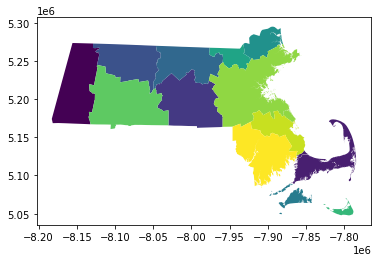

In [5]:
boundaries.plot(column='OBJECTID')

In [6]:
zipcodes = gpd.read_file('data/zipcodes/zipcodes/tl_2010_25_zcta510.shp')

In [7]:
zipcodes.head()

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,25,02536,2502536,B5,G6350,S,71696166,9066635,+41.5969756,-070.5678768,N,"POLYGON ((-70.59239 41.56006, -70.59268 41.559..."
1,25,02556,2502556,B5,G6350,S,10034104,1164445,+41.6394454,-070.6245149,N,"POLYGON ((-70.62389 41.61673, -70.62633 41.617..."
2,25,02540,2502540,B5,G6350,S,27746696,4550024,+41.5741900,-070.6282848,N,"POLYGON ((-70.62389 41.61673, -70.62262 41.616..."
3,25,02646,2502646,B5,G6350,S,7798581,801405,+41.6705961,-070.0714493,N,"POLYGON ((-70.07925 41.67769, -70.07864 41.677..."
4,25,01237,2501237,B5,G6350,S,160121626,1140685,+42.5478177,-073.2680327,N,"POLYGON ((-73.23558 42.49333, -73.23587 42.493..."


<AxesSubplot:>

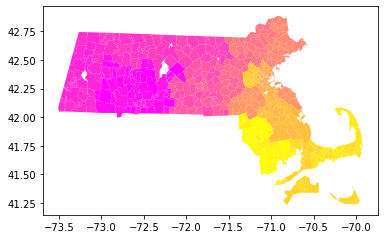

In [8]:
zipcodes.plot(column='GEOID10', cmap='spring')

In [9]:
boundaries.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
boundaries = boundaries.to_crs("epsg:26986") #MA State Plane Projection

In [11]:
zipcodes = zipcodes.to_crs("epsg:26986") #MA State Plane Projection

In [16]:
boston_region = boundaries[boundaries.MPO=="Boston Region"].copy()

<AxesSubplot:>

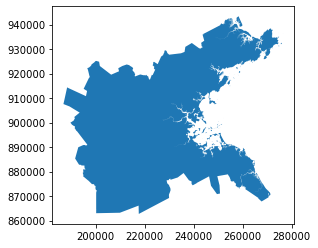

In [17]:
boston_region.plot()

In [18]:
boston_zipcodes = gpd.clip(zipcodes, boston_region)

<AxesSubplot:>

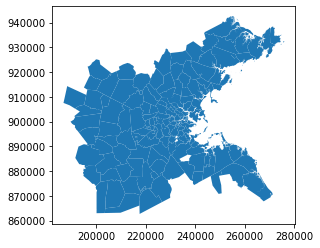

In [23]:
boston_zipcodes.plot()

In [24]:
with rasterio.open('data/land_cover.tif') as landcover_raster:
    shape = landcover_raster.shape
    transform = landcover_raster.transform
    res = landcover_raster.res
    crs = landcover_raster.crs
    nodata = landcover_raster.nodata
    bounds = landcover_raster.bounds
    landcover = landcover_raster.read(1)

In [ ]:
landcover_raster.meta

In [ ]:
show(landcover, transform=transform, cmap='Paired')
plt.show()